**salary price prediction project**



**Abstract:**

**In this project, we develop a predictive system to estimate employee salaries based on demographic and professional attributes such as gender, age, education level, job title, and years of experience. We utilize a publicly available Salary dataset for analysis and modeling. Data preprocessing steps include handling missing values, encoding categorical variables, and exploring feature distributions through visualization techniques. The modeling phase compares the performance of three regression algorithms: Linear Regression, Decision Tree Regression, and Random Forest Regression. Each model is evaluated based on key metrics including R² score, Mean Absolute Error (MAE), and Mean Squared Error (MSE). The Random Forest Regressor achieved the highest predictive accuracy among the tested models. A Streamlit-based web application was developed to enable interactive salary prediction by allowing users to input relevant features and receive real-time predictions. The project demonstrates an end-to-end pipeline from raw data analysis to a deployable machine learning application.**



In [288]:
import joblib
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [67]:
# Load dataset
df = pd.read_csv("C:/Users/Grancy/Downloads/Salary_Data (1).csv")
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [71]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


**Null_data**

In [73]:
# Checking for null data

df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

**Drop_Null_Values**

In [75]:
# Dropping null values from database

df.dropna(inplace=True)

**Unique_value_counts**

In [77]:
# Compute unique value counts for each feature variable

unique_counts = df.nunique()
unique_counts

Age                     41
Gender                   3
Education Level          7
Job Title              191
Years of Experience     37
Salary                 444
dtype: int64

**pie_chart**

In [79]:
cols = ['Gender', 'Age', 'Education Level', 'Job Title', 'Years of Experience']

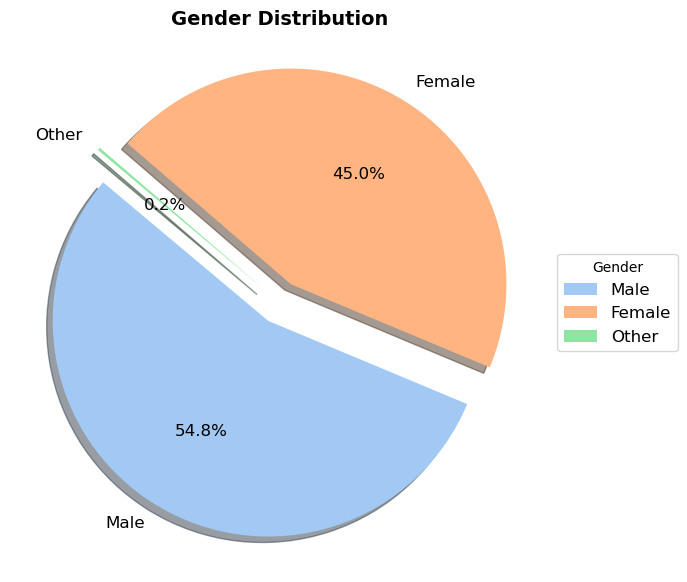

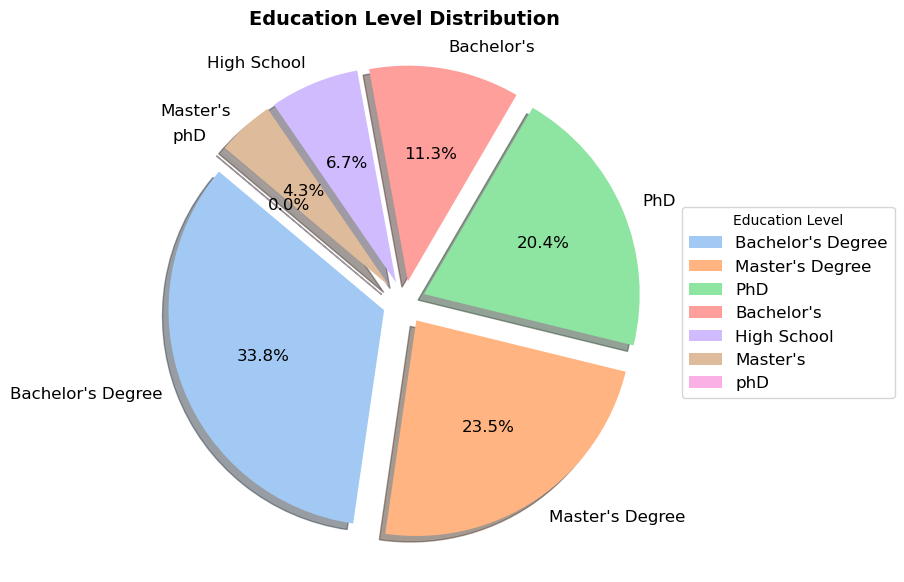

In [109]:
for col in ['Gender', 'Education Level']:
    counts = df[col].value_counts()
    explode = [0.1] * len(counts)  # Explode all slices
    colors = sns.color_palette("pastel", len(counts))  # Use pastel colors

    plt.figure(figsize=(7, 7))
    wedges, texts, autotexts = plt.pie(
        counts, labels=counts.index, autopct='%1.1f%%', startangle=140, 
        explode=explode, colors=colors, shadow=True, textprops={'fontsize': 12}
    )

    plt.title(f'{col} Distribution', fontsize=14, fontweight='bold')

    # Position the legend outside the pie chart
    plt.legend(wedges, counts.index, title=col, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12)

    plt.show()

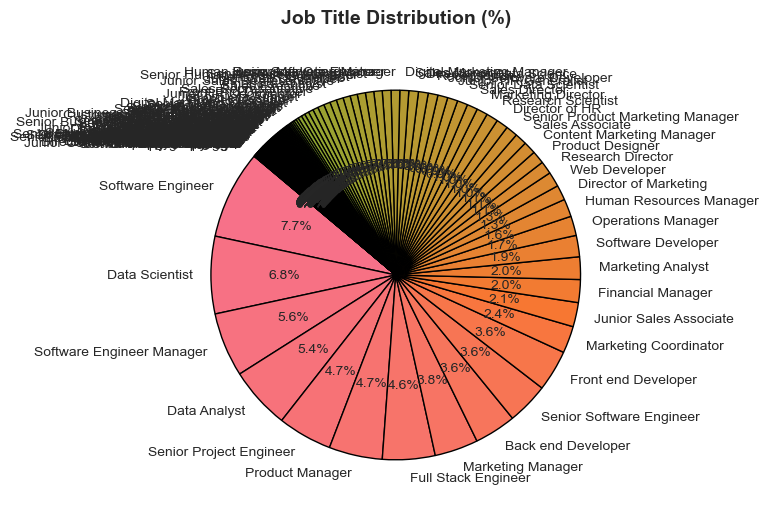

In [139]:
plt.figure(figsize=(10, 6))

# Count occurrences of each job title
job_counts = df['Job Title'].value_counts()

# Plot pie chart
plt.pie(job_counts, labels=job_counts.index, autopct='%1.1f%%', 
        startangle=140, colors=sns.color_palette("husl", len(job_counts)),
        wedgeprops={'edgecolor': 'black'})

# Add title
plt.title('Job Title Distribution (%)', fontsize=14, fontweight='bold', pad=15)

# Show chart
plt.show()

**bar_plots**

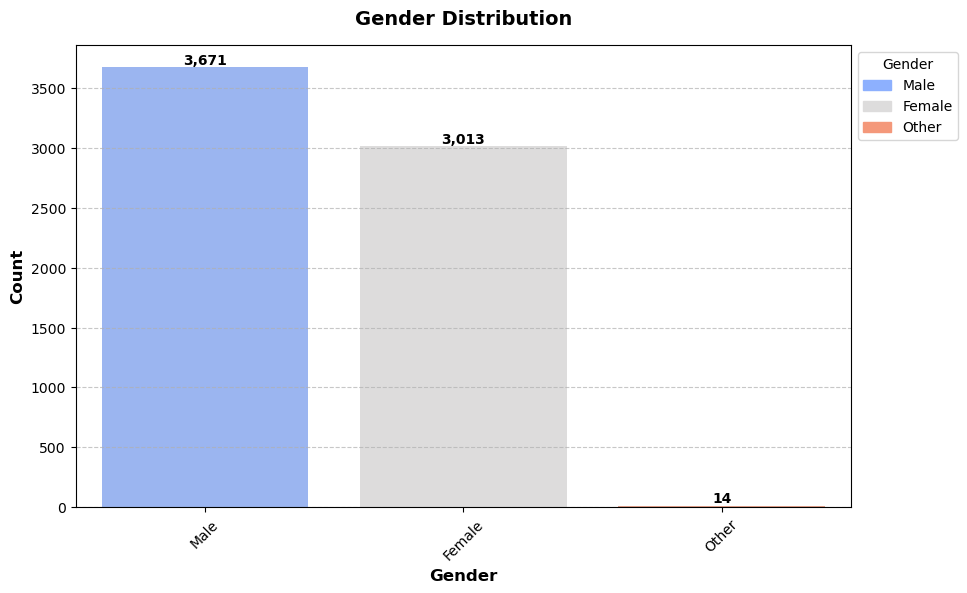

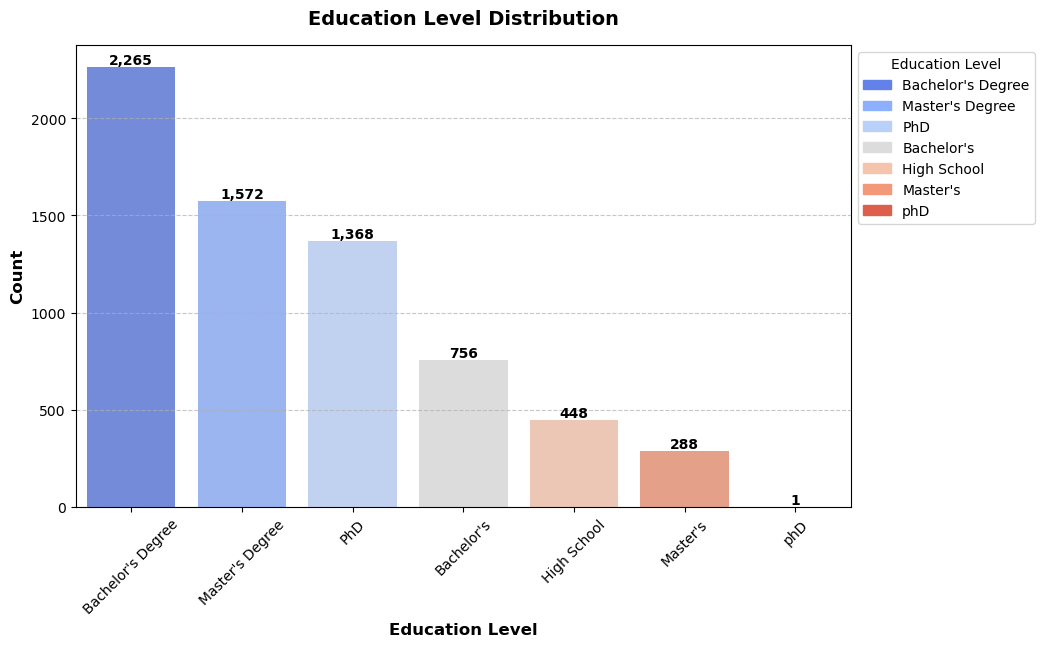

In [119]:
# Select categorical columns
categorical_cols = ['Gender', 'Education Level']

# Iterate over each categorical feature
for col in categorical_cols:
    plt.figure(figsize=(10, 6))

    # Create barplot with color palette
    ax = sns.barplot(x=df[col].value_counts().index, 
                     y=df[col].value_counts().values, 
                     palette="coolwarm")

    # Set title and labels
    plt.title(f'{col} Distribution', fontsize=14, fontweight='bold', pad=15)
    plt.xlabel(col, fontsize=12, fontweight='bold')
    plt.ylabel("Count", fontsize=12, fontweight='bold')

    # Rotate x-axis labels for readability
    plt.xticks(rotation=45, fontsize=10)

    # Add value labels on bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():,.0f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

    # Add legend outside the chart
    handles = [plt.Rectangle((0, 0), 1, 1, color=c) for c in sns.color_palette("coolwarm", len(df[col].unique()))]
    plt.legend(handles, df[col].value_counts().index, title=col, loc='upper left', bbox_to_anchor=(1, 1))

    # Adjust layout for better visualization
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
    plt.show()

**histogram**

C:\Users\Grancy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


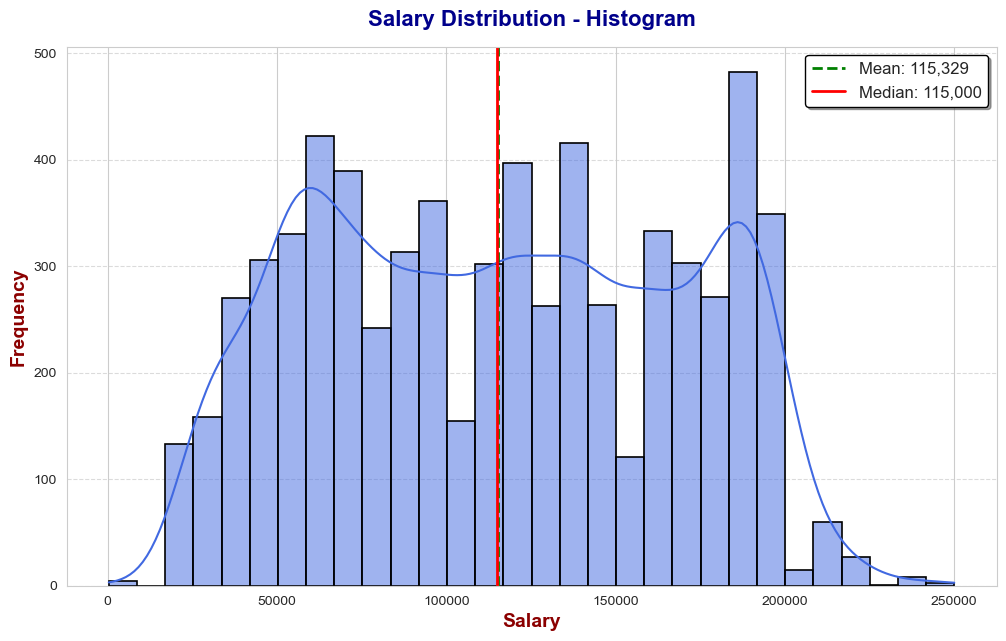

In [123]:
# Set Seaborn style for better visuals
sns.set_style("whitegrid")  

# Create histogram
plt.figure(figsize=(12, 7))
ax = sns.histplot(df['Salary'], kde=True, bins=30, color='royalblue', edgecolor='black', linewidth=1.2)

# Customize title and labels
plt.title('Salary Distribution - Histogram', fontsize=16, fontweight='bold', pad=15, color='darkblue')
plt.xlabel('Salary', fontsize=14, fontweight='bold', color='darkred')
plt.ylabel('Frequency', fontsize=14, fontweight='bold', color='darkred')

# Add mean & median lines for reference
mean_salary = df['Salary'].mean()
median_salary = df['Salary'].median()
plt.axvline(mean_salary, color='green', linestyle='--', linewidth=2, label=f'Mean: {mean_salary:,.0f}')
plt.axvline(median_salary, color='red', linestyle='-', linewidth=2, label=f'Median: {median_salary:,.0f}')

# Add annotations
plt.legend(fontsize=12, loc='upper right', frameon=True, shadow=True, edgecolor='black')

# Grid & border adjustments
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines

# Show the plot
plt.show()

**scatterplot**

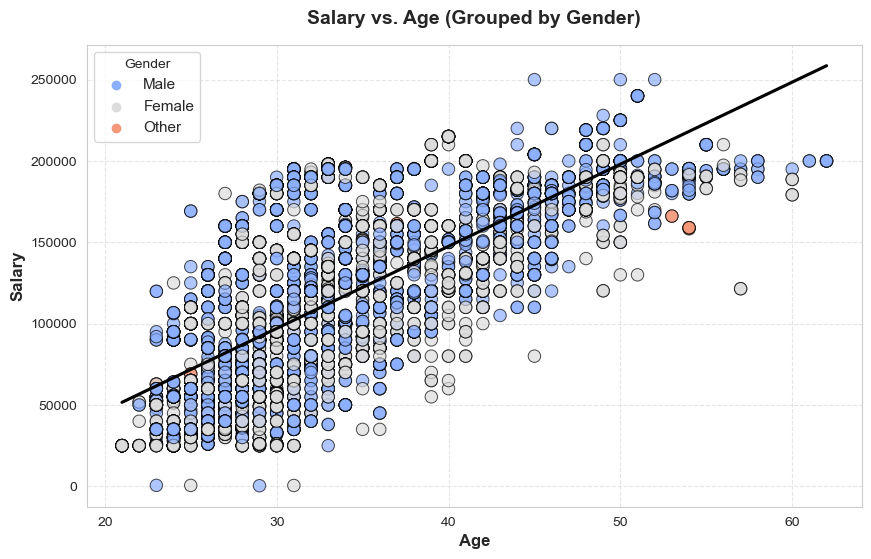

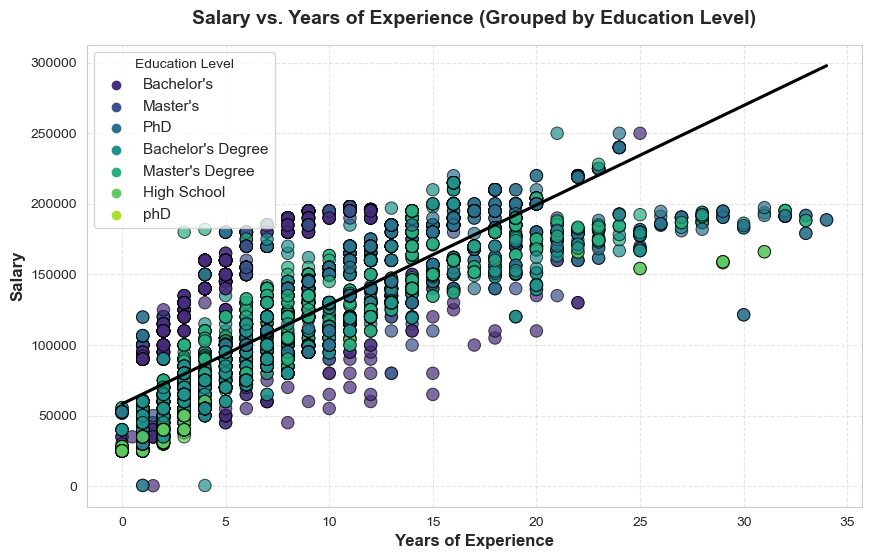

In [125]:
# Set style
sns.set_style("whitegrid")

# Scatter Plot - Salary vs. Age (Hue = Gender) with Trend Line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Age'], y=df['Salary'], hue=df['Gender'], 
                palette='coolwarm', alpha=0.7, edgecolor='black', s=80)
sns.regplot(x=df['Age'], y=df['Salary'], scatter=False, color='black', ci=None)  # Trend Line

plt.title('Salary vs. Age (Grouped by Gender)', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Age', fontsize=12, fontweight='bold')
plt.ylabel('Salary', fontsize=12, fontweight='bold')
plt.legend(title='Gender', loc='upper left', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Scatter Plot - Salary vs. Years of Experience (Hue = Education Level) with Trend Line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Years of Experience'], y=df['Salary'], hue=df['Education Level'], 
                palette='viridis', alpha=0.7, edgecolor='black', s=80)
sns.regplot(x=df['Years of Experience'], y=df['Salary'], scatter=False, color='black', ci=None)  # Trend Line

plt.title('Salary vs. Years of Experience (Grouped by Education Level)', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Years of Experience', fontsize=12, fontweight='bold')
plt.ylabel('Salary', fontsize=12, fontweight='bold')
plt.legend(title='Education Level', loc='upper left', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


**pairplot**

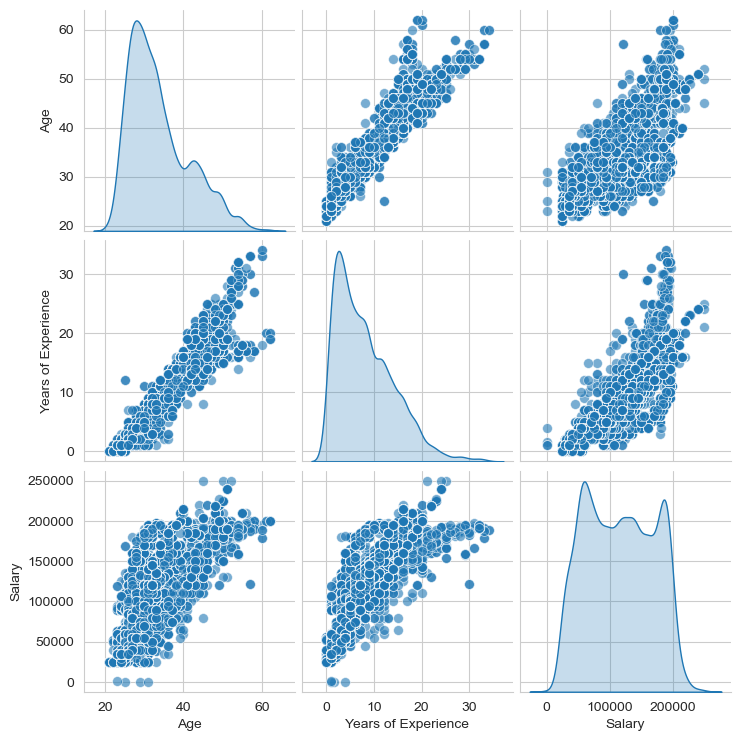

In [198]:
# Create a pairplot for all numerical columns in the dataset
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha': 0.6, 's': 50}, diag_kws={'shade': True})

# Show the plot
plt.show()

**bar_plot**

C:\Users\Grancy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Grancy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


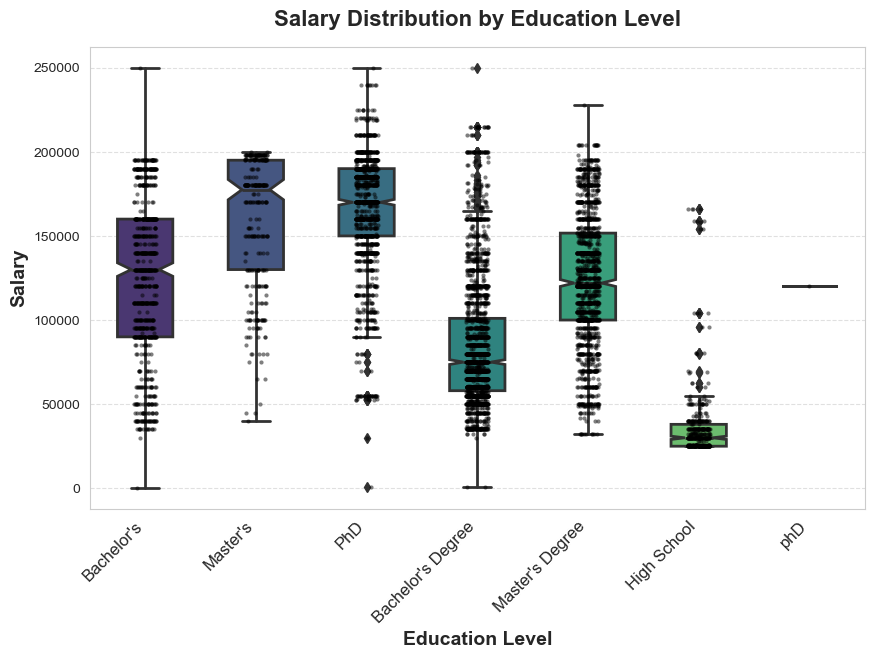

In [151]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Education Level'], y=df['Salary'], palette="viridis", width=0.5, linewidth=2, notch=True)
sns.stripplot(x=df['Education Level'], y=df['Salary'], color='black', size=3, jitter=True, alpha=0.5)

plt.title('Salary Distribution by Education Level', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Education Level', fontsize=14, fontweight='bold')
plt.ylabel('Salary', fontsize=14, fontweight='bold')

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


**violinplot_plot**

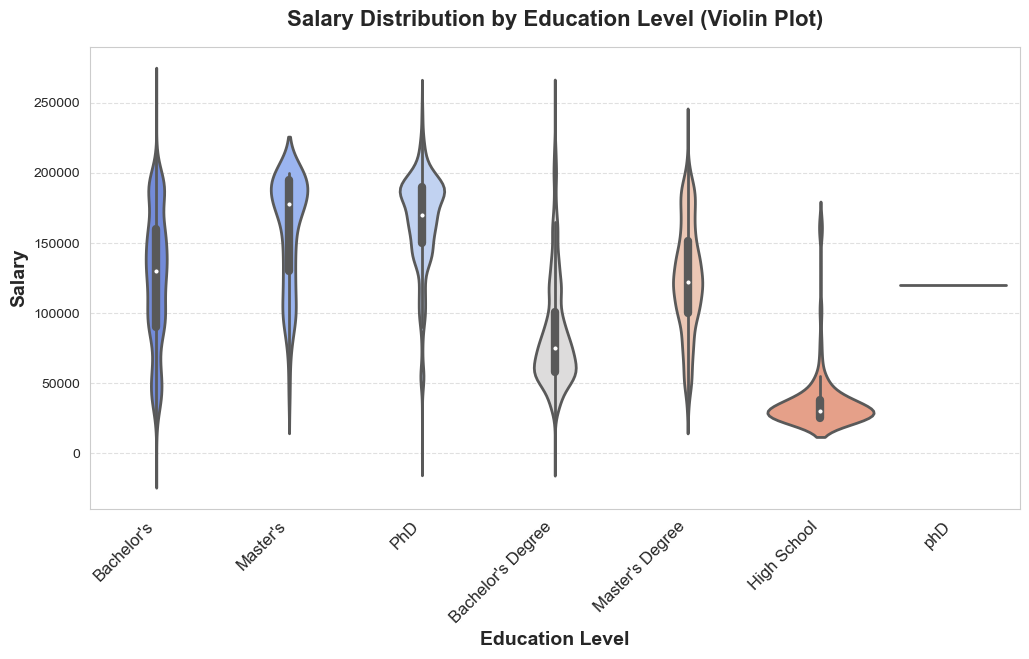

In [156]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

# Ignore warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(12, 6))

# Create violin plot
sns.violinplot(x=df['Education Level'], y=df['Salary'], palette="coolwarm", inner="box", linewidth=2)

# Title and labels
plt.title('Salary Distribution by Education Level (Violin Plot)', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Education Level', fontsize=14, fontweight='bold')
plt.ylabel('Salary', fontsize=14, fontweight='bold')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add grid for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show plot
plt.show()


**training_testing_data**

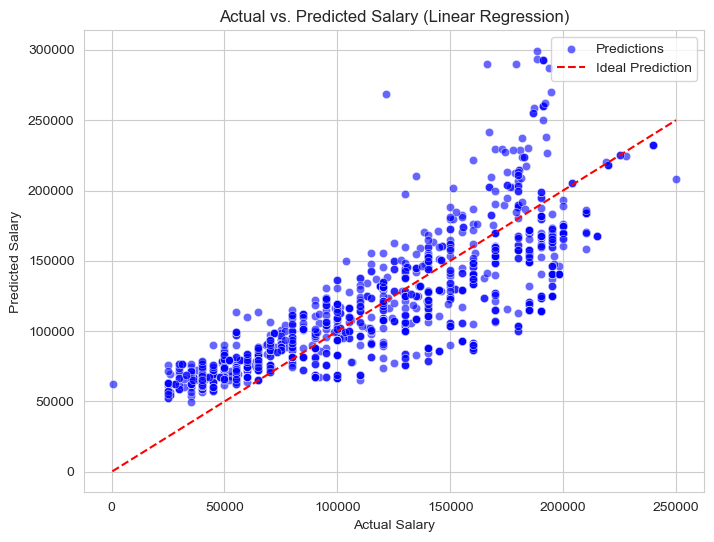

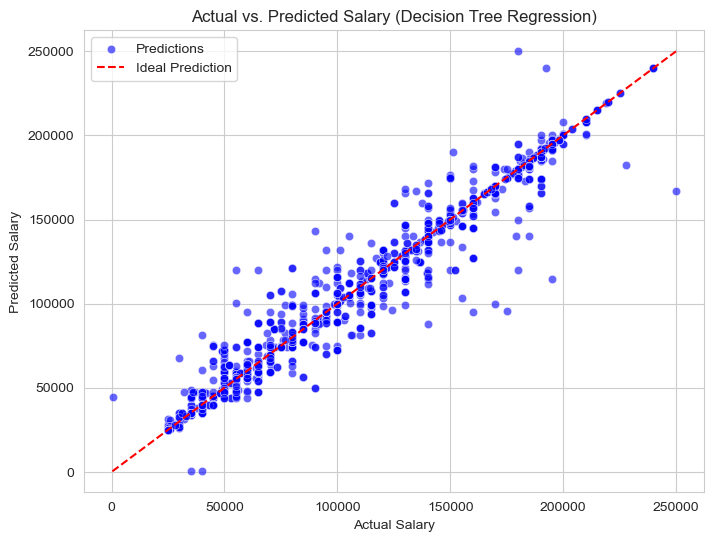

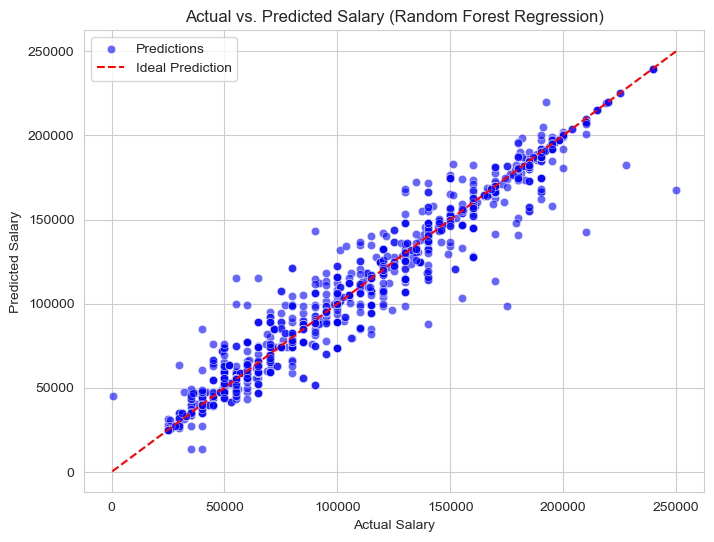


Model Performance Comparison:

                                   MAE           MSE  R² Score
Linear Regression         24082.456847  9.300659e+08  0.673828
Decision Tree Regression   6608.343468  1.472971e+08  0.948343
Random Forest Regression   6732.652175  1.335864e+08  0.953152
Models saved successfully!


In [300]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Encoding categorical variables
label_encoders = {}
for col in ["Gender", "Education Level"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for later use

# Selecting features and target variable
X = df[['Age', 'Gender', 'Education Level', 'Years of Experience']]
y = df['Salary']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regression": DecisionTreeRegressor(random_state=42),
    "Random Forest Regression": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Dictionary to store model results
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluate model performance
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MAE": mae, "MSE": mse, "R² Score": r2}
    
    # Scatter plot for Actual vs. Predicted Salaries
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, label="Predictions", color="blue")
    plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red', label="Ideal Prediction")
    plt.xlabel("Actual Salary")
    plt.ylabel("Predicted Salary")
    plt.title(f"Actual vs. Predicted Salary ({name})")
    plt.legend()
    plt.grid(True)
    plt.show()

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T[['MAE', 'MSE', 'R² Score']]
print("\nModel Performance Comparison:\n")
print(results_df)

# Save models
for name, model in models.items():
    joblib.dump(model, f"{name.lower().replace(' ', '_')}.pkl")

print("Models saved successfully!")


**Actual_predicted_prices**

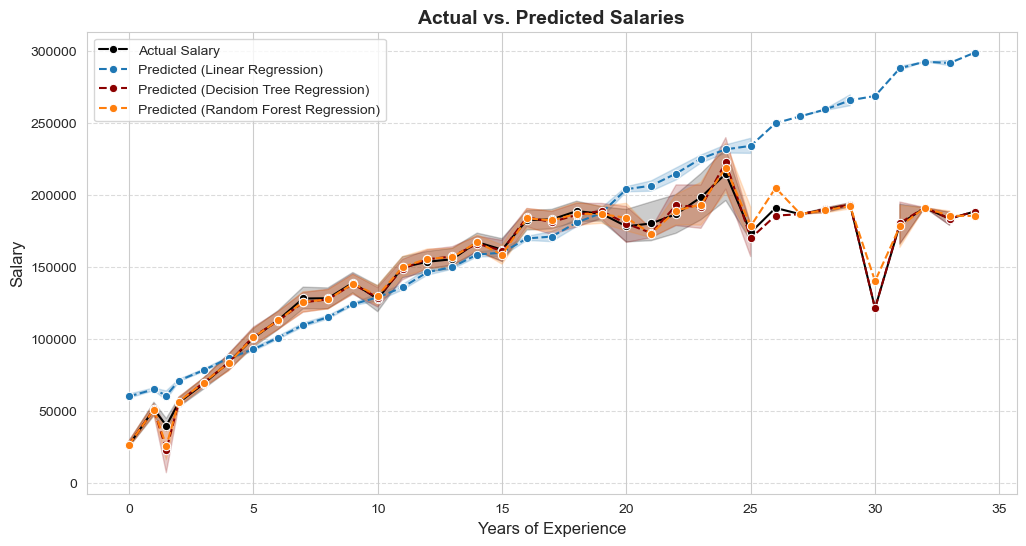

In [302]:
# Sort values based on 'Years of Experience' for a smoother line plot
sorted_indices = X_test['Years of Experience'].argsort()
X_test_sorted = X_test.iloc[sorted_indices]
y_test_sorted = y_test.iloc[sorted_indices]

plt.figure(figsize=(12, 6))

# Plot actual salaries
sns.lineplot(x=X_test_sorted['Years of Experience'], y=y_test_sorted, marker='o', linestyle='-', label='Actual Salary', color='black')

# Plot predicted salaries for each model
for name, model in models.items():
    y_pred_sorted = model.predict(X_test_sorted)  # Predict using sorted X_test data
    
    # Change Decision Tree line color to dark red
    line_color = "darkred" if name == "Decision Tree Regression" else None  
    
    sns.lineplot(x=X_test_sorted['Years of Experience'], y=y_pred_sorted, marker='o', linestyle='--', label=f'Predicted ({name})', color=line_color)

# Add labels, title, and legend
plt.title("Actual vs. Predicted Salaries", fontsize=14, fontweight="bold")
plt.xlabel("Years of Experience", fontsize=12)
plt.ylabel("Salary", fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


**straemlit_App**

In [18]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Load trained models
linear_regressor = joblib.load("C:/Users/Grancy/salary_price_prediction/linear_regression.pkl")
decision_tree_regressor = joblib.load("C:/Users/Grancy/salary_price_prediction/decision_tree_regression.pkl")
random_forest_regressor = joblib.load("C:/Users/Grancy/salary_price_prediction/random_forest_regression.pkl")

# Streamlit App Title
st.title("Employee Salary Prediction App")
st.sidebar.header("User Input Features")

# User Input for Features
age = st.sidebar.number_input("Age", min_value=18, max_value=65, step=1)
gender = st.sidebar.selectbox("Gender", ["Male", "Female"])
education_level = st.sidebar.selectbox("Education Level", ["High School", "Bachelor's", "Master's", "PhD"])
years_experience = st.sidebar.number_input("Years of Experience", min_value=0.0, max_value=50.0, step=0.1)

# Encode categorical inputs
gender_encoded = 1 if gender == "Male" else 0
education_map = {"High School": 0, "Bachelor's": 1, "Master's": 2, "PhD": 3}
education_encoded = education_map[education_level]

# Prepare input data
input_features = np.array([[age, gender_encoded, education_encoded, years_experience]])

# Sample Actual Salary Data
y_test = np.linspace(30000, 150000, 50)  # Simulated actual salary values
x_test = np.linspace(1, 50, 50)  # Simulated X values

# Prediction Button
if st.sidebar.button("Predict Salary"):
    predicted_salary = random_forest_regressor.predict(input_features)[0]
    
    # Display Predicted and Actual Salaries
    st.subheader("Salary Comparison")
    salary_df = pd.DataFrame({"Type": ["Actual Salary", "Predicted Salary"],
                              "Salary": [y_test.mean(), predicted_salary]})
    st.table(salary_df)
    
    # Line Plot - Actual vs. Predicted Salaries
    st.subheader("Actual vs. Predicted Salaries (Line Plot)")
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Actual Salary Line
    sns.lineplot(x=x_test, y=y_test, marker='o', linestyle='-', label='Actual Salary', color='black')
    
    # Predicted Salary Line
    ax.axhline(predicted_salary, color='red', linestyle='--', label='Predicted Salary')
    
    ax.set_xlabel("Years of Experience")
    ax.set_ylabel("Salary")
    ax.set_title("Actual vs. Predicted Salaries")
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    st.pyplot(fig)
    
    st.success("Prediction Complete!")


2025-04-28 14:42:34.493 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-28 14:42:35.931 
  command:

    streamlit run C:\Users\Grancy\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-04-28 14:42:35.933 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-28 14:42:35.934 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-28 14:42:35.936 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-28 14:42:35.938 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-28 14:42:35.940 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-28 14:42:35.942 Thread 'MainThread': m

**conclusion:**

**1. The Random Forest model achieved the highest R-squared score (0.953152) and the lowest MSE, MAE, and RMSE values, indicating the best predictive performance
among the three models.**

**2. The Decision Tree model performed wellwith an R-squared score of (0.948343) but had higher errors compared to the Random Forest.**

**3. The Linear Regression model had the lowest R-squared score (0.673828) and the highest errors, suggesting it may not capture the underlying patterns in the data as effectively as the ensemble models.**

**In conclusion, the Random Forest model appears to be the most suitable for predicting salaries in this dataset, as it offers the highest predictive accuracy and the lowest error metrics. Further optimization and fine-tuning of the Random Forest model could potentially lead to even better results**